# Decision Dependent Games Simulation
## Synthetic Linear Regression Problem with Location Families

We extend the linear regression example from Miller et. al. (http://arxiv.org/abs/2102.08570) to the multiplayer framework where the models of each player affect the distributions of data seen by all.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dd_regression import *
import seaborn as sns
sns.set_style('darkgrid')

The performative 2-player linear regression problem is set up as follows. For each player $k\in\{1,2\}$ we generate data

$$x^k \sim \mathcal{N}(0,\Sigma_{x^k}),\quad U^k \sim \mathcal{N}(0,\sigma_{y^k}), \quad y^k = \langle \beta^k, x^k \rangle + \langle \mu^k, \theta^k \rangle + \langle \gamma^k, \theta^{-k} \rangle + U^k$$

Where $x^k\in\mathbb{R}^d, y^k\in\mathbb{R}, U^k\in\mathbb{R}$. The performative effects are given by $\mu^k,\gamma^k$, which are drawn randomly. We can calculate the $\varepsilon^k$-sensitivity parameters of the performative effects
$$\varepsilon^k = \sqrt{||\mu^k||_2^2+||\gamma^k||_2^2}$$

## Configuration

In [2]:
np.random.seed(3763)

d_1 = 20  # d_k is the dimension of the data for player k
d_2 = 20

perf_var = np.array([[1,1],[1,1]])  # perf_var[i,j] determines the size of the randomly drawn performative effects

Sigma_x_1 = np.eye(d_1)  # Sigma_x_k defines the covariance of samples of features x for player k's data
Sigma_x_2 = np.eye(d_2)
sigma_y_1 = 10  # sigma_y_k defines the disturbance for player k's data
sigma_y_2 = 10

beta_1 = np.random.normal(size=d_1)  # randomly generate each player's parameter vector
beta_2 = np.random.normal(size=d_2)
mu_1 = np.random.normal(scale=perf_var[0,0], size=d_1)  # randomly generate location family parameters which define the performative effects
mu_2 = np.random.normal(scale=perf_var[1,1], size=d_2)
gamma_1 = np.random.normal(scale=perf_var[0,1], size=d_1)
gamma_2 = np.random.normal(scale=perf_var[1,0], size=d_2)

stage_1_samples = int(1e4)  # Set number of samples in stage 1, iterations in stage 2
stage_2_iter = int(1e2)

In [3]:
n_lst = [10, 20, 30, 50, 100, 1000, 10000, 100000]
pr_1_lst = []
pr_2_lst = []

for n_r in n_lst:
    pr_1, pr_2 = run_game(n_r, d_1, d_2, mu_1, gamma_1, mu_2, gamma_2,
                          stage_2_iter, stage_1_samples,
                          Sigma_x_1, Sigma_x_2, sigma_y_1, sigma_y_2,
                          beta_1, beta_2)
    pr_1_lst.append(pr_1)
    pr_2_lst.append(pr_2)

C:\Users\evanj\Documents\Python\DD-Games\dd_regression.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(z_1_lst), np.array(z_2_lst), np.array(theta_1_lst), np.array(theta_2_lst)


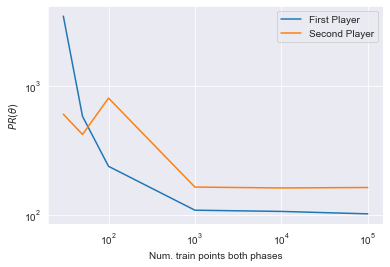

In [4]:
plt.plot(n_lst[2:], pr_1_lst[2:], label = 'First Player')
plt.plot(n_lst[2:], pr_2_lst[2:], label = 'Second Player')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel("Num. train points both phases")
plt.ylabel(r"$PR(\theta)$")
plt.savefig("/Users/evanj/Desktop/multiplayer_pp_simulation.pdf", format = 'pdf')